In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
import os

path = "."

filenames= os.listdir (path) # get all files' and folders' names in the current directory

In [3]:
paths = ['1106syringepump','1109syringepump']

In [4]:

dic_keys = ['1106','1109']

filenames = os.listdir (paths[0])
fnames = []

for f in filenames:
    if f[-3:]  == 'CSV':
        fnames.append(f)
        

In [5]:
filenames = os.listdir (paths[1])
fnames = []

for f in filenames:
    if f[-3:]  == 'CSV':
        fnames.append(f)
        

In [6]:
dic_samples = {}

low_ind = 900
high_ind = 3000

for path in paths:
    filenames = os.listdir (path)
    fnames = []

    for f in filenames:
        if f[-3:]  == 'CSV':
            fnames.append(f)
    count = 0;
    
    labels = fnames
    
    for label in labels:
        df = pd.read_csv(path+'/'+label,header = None)
        if count == 0:
            df2 = df 
            df2.columns = ['wn','Absorbance']
        else:
            df.columns = ['wn','Absorbance']
            df2 = pd.concat([df2, df['Absorbance']], axis = 1)
        count = count+1
    df2.set_index('wn', inplace = True)
    df2.columns = labels
    df = df2.transpose()
    df = df.loc[:,df.columns > low_ind]
    df = df.loc[:,df.columns < high_ind]
    dic_samples[path] = df


    

In [7]:
df = dic_samples[paths[1]]
df

wn,900.1119,900.5941,901.0762,901.5583,902.0404,902.5225,903.0046,903.4868,903.9689,904.451,...,2995.3920000000003,2995.8740000000003,2996.3559999999998,2996.8379999999997,2997.32,2997.802,2998.284,2998.7659999999996,2999.2490000000003,2999.7309999999998
sample01.CSV,-0.029271,-0.028403,-0.027577,-0.026818,-0.026120,-0.025450,-0.024763,-0.024027,-0.023249,-0.022482,...,0.014766,0.014434,0.014105,0.013779,0.013457,0.013139,0.012824,0.012516,0.012219,0.011935
sample02.CSV,-0.009229,-0.008963,-0.008934,-0.009127,-0.009477,-0.009882,-0.010222,-0.010385,-0.010301,-0.009951,...,0.009955,0.009895,0.009836,0.009767,0.009682,0.009580,0.009462,0.009329,0.009182,0.009019
sample03.CSV,-0.003188,-0.003023,-0.002848,-0.002640,-0.002390,-0.002098,-0.001775,-0.001442,-0.001127,-0.000861,...,0.008679,0.008671,0.008623,0.008543,0.008448,0.008346,0.008246,0.008147,0.008051,0.007959
sample04.CSV,-0.019017,-0.018500,-0.018033,-0.017644,-0.017323,-0.017023,-0.016681,-0.016243,-0.015701,-0.015093,...,0.016782,0.016665,0.016515,0.016317,0.016062,0.015753,0.015403,0.015038,0.014683,0.014363
sample05.CSV,-0.010536,-0.010076,-0.009881,-0.009898,-0.010035,-0.010187,-0.010258,-0.010184,-0.009943,-0.009556,...,0.012807,0.012734,0.012667,0.012585,0.012471,0.012316,0.012126,0.011916,0.011705,0.011513
sample06.CSV,0.003370,0.003289,0.002944,0.002422,0.001852,0.001361,0.001040,0.000919,0.000967,0.001105,...,0.006870,0.007033,0.007188,0.007295,0.007326,0.007271,0.007142,0.006971,0.006797,0.006651
sample07.CSV,-0.000993,-0.000749,-0.000547,-0.000425,-0.000383,-0.000370,-0.000310,-0.000124,0.000222,0.000706,...,0.007298,0.007322,0.007309,0.007248,0.007141,0.007001,0.006854,0.006722,0.006623,0.006562
sample08.CSV,-0.012796,-0.012224,-0.011748,-0.011383,-0.011120,-0.010925,-0.010749,-0.010538,-0.010259,-0.009910,...,0.013621,0.013586,0.013520,0.013397,0.013214,0.012983,0.012738,0.012512,0.012334,0.012215
sample09.CSV,-0.023570,-0.023189,-0.022786,-0.022362,-0.021911,-0.021412,-0.020824,-0.020104,-0.019222,-0.018183,...,0.016666,0.016467,0.016314,0.016187,0.016056,0.015896,0.015690,0.015436,0.015148,0.014848
sample10.CSV,-0.006826,-0.006114,-0.005533,-0.005145,-0.004981,-0.005013,-0.005155,-0.005276,-0.005247,-0.004985,...,0.009960,0.009859,0.009780,0.009723,0.009684,0.009649,0.009603,0.009537,0.009451,0.009353


In [8]:
labels_1109 = pd.read_csv(paths[1]+'/Labels.csv')

labels_1109.set_index('Sample')

,F water,F glycerol
Sample,,
Sample01.CSV,0.062,0.938
Sample02.CSV,0.562,0.438
Sample03.CSV,0.688,0.312
Sample04.CSV,0.188,0.812
Sample05.CSV,0.438,0.562
Sample06.CSV,0.938,0.062
Sample07.CSV,0.906,0.094
Sample08.CSV,0.406,0.594
Sample09.CSV,0.156,0.844


In [9]:
idx = 0
df.insert(loc=idx, column='F water', value = labels_1109['F water'])
idx = 1
df.insert(loc=idx, column='F glycerol', value = labels_1109['F glycerol'])


df['F water'] = labels_1109['F water'].values
df['F glycerol'] = labels_1109['F glycerol'].values



wn,F water,F glycerol,900.1119,900.5941,901.0762,901.5583,902.0404,902.5225,903.0046,903.4868,...,2995.3920000000003,2995.8740000000003,2996.3559999999998,2996.8379999999997,2997.32,2997.802,2998.284,2998.7659999999996,2999.2490000000003,2999.7309999999998
sample01.CSV,0.062,0.938,-0.029271,-0.028403,-0.027577,-0.026818,-0.026120,-0.025450,-0.024763,-0.024027,...,0.014766,0.014434,0.014105,0.013779,0.013457,0.013139,0.012824,0.012516,0.012219,0.011935
sample02.CSV,0.562,0.438,-0.009229,-0.008963,-0.008934,-0.009127,-0.009477,-0.009882,-0.010222,-0.010385,...,0.009955,0.009895,0.009836,0.009767,0.009682,0.009580,0.009462,0.009329,0.009182,0.009019
sample03.CSV,0.688,0.312,-0.003188,-0.003023,-0.002848,-0.002640,-0.002390,-0.002098,-0.001775,-0.001442,...,0.008679,0.008671,0.008623,0.008543,0.008448,0.008346,0.008246,0.008147,0.008051,0.007959
sample04.CSV,0.188,0.812,-0.019017,-0.018500,-0.018033,-0.017644,-0.017323,-0.017023,-0.016681,-0.016243,...,0.016782,0.016665,0.016515,0.016317,0.016062,0.015753,0.015403,0.015038,0.014683,0.014363
sample05.CSV,0.438,0.562,-0.010536,-0.010076,-0.009881,-0.009898,-0.010035,-0.010187,-0.010258,-0.010184,...,0.012807,0.012734,0.012667,0.012585,0.012471,0.012316,0.012126,0.011916,0.011705,0.011513


In [10]:
df['glycerol %'] = df['F glycerol']*0.1/(df['F glycerol'] + df['F water'])


df.reset_index(inplace = True)

df.drop(['F water', 'F glycerol'],axis = 1, inplace = True)

df.drop('index', axis = 1, inplace = True)



In [11]:
df.sort_values(by = 'glycerol %', inplace = True)

In [13]:
df2 = dic_samples[paths[0]]
df2

labels_1107 = pd.read_csv(paths[0]+'/Labels.csv')

labels_1107.set_index('Sample')

idx = 0
#df2.insert(loc=idx, column='F water', value = labels_1109['F water'])
idx = 1
#df2.insert(loc=idx, column='F glycerol', value = labels_1109['F glycerol'])


df2['F water'] = labels_1107['F water'].values
df2['F glycerol'] = labels_1107['F glycerol'].values

df2.head()

df2['glycerol %'] = df2['F glycerol']*0.1/(df2['F glycerol'] + df2['F water'])


df2.reset_index(inplace = True)

df2.drop(['F water', 'F glycerol'],axis = 1, inplace = True)

df2.drop('index', axis = 1, inplace = True)



df2.sort_values(by = 'glycerol %', inplace = True)

df2

wn,900.1119,900.5941,901.0762,901.5583,902.0404,902.5225,903.0046,903.4868,903.9689,904.451,...,2995.8740000000003,2996.3559999999998,2996.8379999999997,2997.32,2997.802,2998.284,2998.7659999999996,2999.2490000000003,2999.7309999999998,glycerol %
9,0.001624,0.002400,0.002916,0.003048,0.002756,0.002105,0.001241,0.000361,-0.000342,-0.000729,...,0.006446,0.006412,0.006378,0.006340,0.006294,0.006240,0.006181,0.006122,0.006067,0.0062
4,0.004107,0.004109,0.003763,0.003101,0.002223,0.001263,0.000364,-0.000354,-0.000824,-0.001036,...,0.007125,0.007149,0.007144,0.007117,0.007085,0.007071,0.007095,0.007165,0.007273,0.0125
1,-0.004399,-0.003678,-0.003117,-0.002809,-0.002749,-0.002857,-0.003009,-0.003093,-0.003043,-0.002862,...,0.007924,0.007754,0.007516,0.007219,0.006883,0.006538,0.006211,0.005928,0.005709,0.0250
8,0.001060,0.001124,0.000697,-0.000184,-0.001363,-0.002601,-0.003628,-0.004226,-0.004281,-0.003817,...,0.010552,0.010433,0.010252,0.010028,0.009792,0.009573,0.009394,0.009266,0.009187,0.0312
5,-0.006476,-0.006066,-0.006003,-0.006360,-0.007088,-0.008028,-0.008954,-0.009639,-0.009915,-0.009721,...,0.010024,0.009751,0.009474,0.009212,0.008989,0.008821,0.008717,0.008680,0.008699,0.0375
0,-0.014106,-0.013543,-0.013318,-0.013468,-0.013907,-0.014446,-0.014860,-0.014954,-0.014633,-0.013926,...,0.009327,0.009193,0.009025,0.008825,0.008595,0.008345,0.008086,0.007834,0.007607,0.0500
3,-0.010803,-0.010387,-0.010340,-0.010661,-0.011262,-0.011978,-0.012611,-0.012976,-0.012955,-0.012530,...,0.013932,0.013680,0.013355,0.012992,0.012634,0.012318,0.012069,0.011899,0.011810,0.0625
2,-0.015122,-0.014738,-0.014457,-0.014370,-0.014498,-0.014774,-0.015065,-0.015211,-0.015087,-0.014649,...,0.014599,0.014388,0.014151,0.013903,0.013660,0.013439,0.013249,0.013088,0.012946,0.0750
7,-0.018591,-0.018006,-0.017628,-0.017461,-0.017441,-0.017462,-0.017418,-0.017235,-0.016895,-0.016430,...,0.015081,0.014841,0.014638,0.014482,0.014373,0.014295,0.014222,0.014123,0.013978,0.0812
6,-0.022033,-0.021502,-0.021141,-0.020962,-0.020896,-0.020820,-0.020593,-0.020116,-0.019372,-0.018438,...,0.015368,0.015183,0.014990,0.014793,0.014610,0.014459,0.014352,0.014287,0.014247,0.0875


In [14]:
df2.drop(9, inplace = True)

In [16]:
data = pd.concat([df2,df])
data.reset_index(inplace = True)
data.drop('index', axis = 1, inplace = True)

In [17]:
data_sorted = data.sort_values(by = 'glycerol %')


wn,900.1119,900.5941,901.0762,901.5583,902.0404,902.5225,903.0046,903.4868,903.9689,904.451,...,2995.8740000000003,2996.3559999999998,2996.8379999999997,2997.32,2997.802,2998.284,2998.7659999999996,2999.2490000000003,2999.7309999999998,glycerol %
9,0.003370,0.003289,0.002944,0.002422,0.001852,0.001361,0.001040,0.000919,0.000967,0.001105,...,0.007033,0.007188,0.007295,0.007326,0.007271,0.007142,0.006971,0.006797,0.006651,0.0062
10,-0.000993,-0.000749,-0.000547,-0.000425,-0.000383,-0.000370,-0.000310,-0.000124,0.000222,0.000706,...,0.007322,0.007309,0.007248,0.007141,0.007001,0.006854,0.006722,0.006623,0.006562,0.0094
0,0.004107,0.004109,0.003763,0.003101,0.002223,0.001263,0.000364,-0.000354,-0.000824,-0.001036,...,0.007125,0.007149,0.007144,0.007117,0.007085,0.007071,0.007095,0.007165,0.007273,0.0125
11,-0.002604,-0.002550,-0.002638,-0.002877,-0.003251,-0.003717,-0.004208,-0.004650,-0.004977,-0.005149,...,0.008184,0.008018,0.007807,0.007578,0.007358,0.007170,0.007032,0.006953,0.006937,0.0156
12,-0.004121,-0.003775,-0.003500,-0.003386,-0.003484,-0.003785,-0.004229,-0.004720,-0.005156,-0.005466,...,0.008558,0.008611,0.008643,0.008640,0.008595,0.008508,0.008394,0.008273,0.008166,0.0219
1,-0.004399,-0.003678,-0.003117,-0.002809,-0.002749,-0.002857,-0.003009,-0.003093,-0.003043,-0.002862,...,0.007924,0.007754,0.007516,0.007219,0.006883,0.006538,0.006211,0.005928,0.005709,0.0250
13,-0.006368,-0.006094,-0.005776,-0.005449,-0.005133,-0.004835,-0.004539,-0.004228,-0.003891,-0.003534,...,0.010644,0.010710,0.010758,0.010756,0.010689,0.010559,0.010385,0.010194,0.010012,0.0281
14,-0.003188,-0.003023,-0.002848,-0.002640,-0.002390,-0.002098,-0.001775,-0.001442,-0.001127,-0.000861,...,0.008671,0.008623,0.008543,0.008448,0.008346,0.008246,0.008147,0.008051,0.007959,0.0312
2,0.001060,0.001124,0.000697,-0.000184,-0.001363,-0.002601,-0.003628,-0.004226,-0.004281,-0.003817,...,0.010552,0.010433,0.010252,0.010028,0.009792,0.009573,0.009394,0.009266,0.009187,0.0312
15,-0.006826,-0.006114,-0.005533,-0.005145,-0.004981,-0.005013,-0.005155,-0.005276,-0.005247,-0.004985,...,0.009859,0.009780,0.009723,0.009684,0.009649,0.009603,0.009537,0.009451,0.009353,0.0344


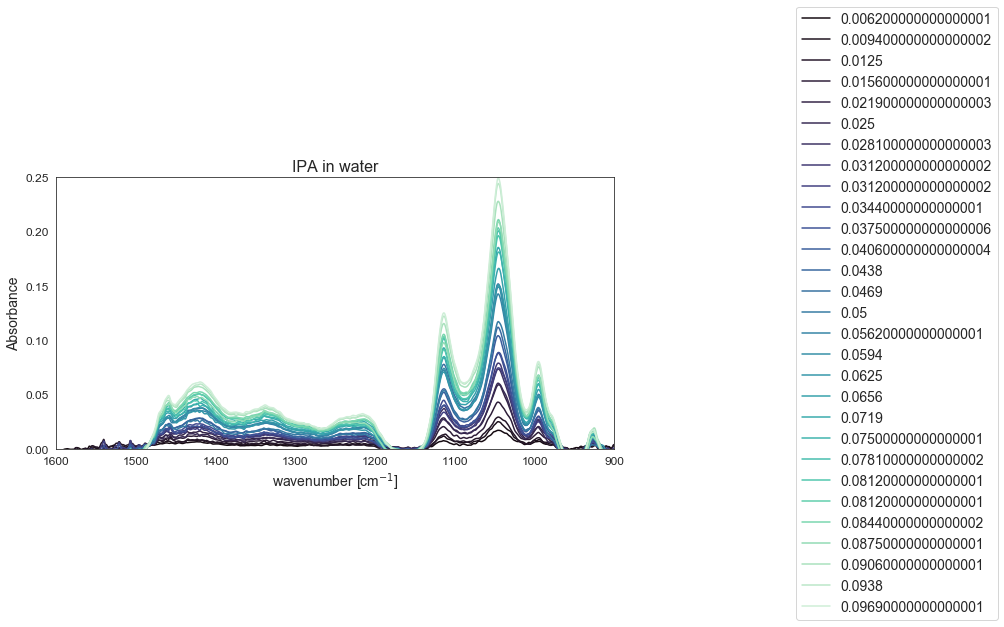

In [18]:
current_palette = sns.color_palette("mako",len(data_sorted))
sns.set_palette(current_palette)
sns.set_style(style='white')

fig = plt.figure()
ax = plt.axes()
j = 0
for j in range(len(data_sorted)):
    ax.plot(data_sorted.columns[:-1],data_sorted.iloc[j,:-1])

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('Absorbance', fontsize=14, fontname = 'Arial')
ax.set_xlabel('wavenumber [cm$^{-1}$]', fontsize=14, fontname = 'Arial')

ax.invert_xaxis()
fig.set_size_inches(10, 5)


plt.legend(data_sorted['glycerol %'],fontsize = 14, loc = 'right', bbox_to_anchor=(1.7, 0.5))

#ax.set_xlim(3000,900) 
#ax.set_ylim(0,0.25)

ax.set_xlim(1600,900) 
ax.set_ylim(0,0.25)

plt.show()


In [19]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

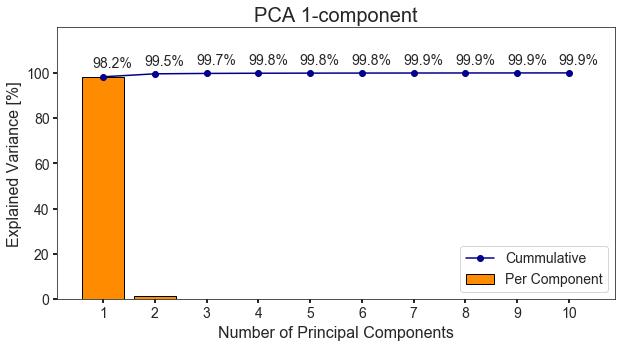

In [23]:
#Principal component analysis

plt.rcParams['xtick.major.size'] = 20
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

color1 = 'darkblue'
color2 = 'darkorange'
pca.explained_variance_
fig = plt.figure()
ax = plt.axes()



n_pca = 10
n = np.arange(1,n_pca+1)
plt.bar(n,pca.explained_variance_ratio_[0:n_pca]*100,
            color = color2,linewidth = 1, edgecolor = 'black')
ax.plot(n,np.cumsum(pca.explained_variance_ratio_[0:n_pca]*100),marker = 'o',color = color1)

ax.set_title('PCA 1-component', fontsize=20, fontname = 'Arial')
for i,j in zip(n,np.cumsum(pca.explained_variance_ratio_[0:n_pca]*100)):
    ax.annotate(str(np.round(j,1))+ '%', xy=(i-0.2, j+4), fontsize = 14)
ax.set_xlabel('Number of Principal Components', fontsize=16, fontname = 'Arial')
ax.set_ylabel('Explained Variance [%]', fontsize=16, fontname = 'Arial')
ax.tick_params(length = 4, labelsize= 14, width =2)
ax.set_ylim([0,120])
plt.legend(['Cummulative','Per Component'], fontsize = 14, loc = 'lower right')
plt.xticks(np.arange(1,n_pca+1))

plt.yticks(np.arange(0,120,20))
fig.set_size_inches(10, 5)

In [30]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

pca = PCA(2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

mlp = LinearRegression()
mlp.fit(X_train, y_train)
print(mlp.score(X_test, y_test))

mean_err = np.mean(np.abs(y_test, mlp.predict(X_test)))*100

print(mean_err)

X = pca.transform(X)


y_predict = mlp.predict(X)



0.9967573147470262
5.886666666666668


In [32]:
y_predict = pd.DataFrame(y_predict)
y_real = pd.DataFrame(y)


y_real.to_csv('y_real.csv')

y_predict.to_csv('y_predict.csv')

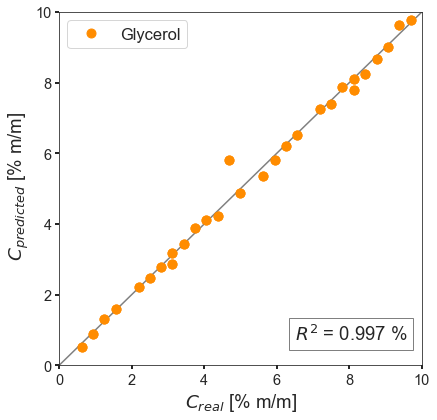

In [33]:
fig = plt.figure()
ax = plt.axes()

s= 9

colors2 = ['darkorange','darkturquoise']


ax.plot(y*100,y_predict*100,'o',
        markerfacecolor = colors2[0], markeredgecolor = colors2[0], markersize = s)

ax.legend(['Glycerol'],fontsize = 16.5)


ax.plot([0,10],[0,10],'-', color = 'gray')

ax.plot(y*100,y_predict*100,'o',
        markerfacecolor = colors2[0],markeredgecolor = colors2[0], markersize = s)


ax.tick_params(length = 4, labelsize= 14.5, width =2)
ax.set_ylabel(' $C_{predicted}$ [% m/m]', fontsize=18.5, fontname = 'Arial')
ax.set_xlabel('$C_{real}$ [% m/m]', fontsize=18.5, fontname = 'Arial')
#ax.set_title('LR',fontsize=16,fontname = 'Arial')
ax.invert_xaxis()
fig.set_size_inches(6.5, 6.5)

ax.set_xlim(0,10) 
ax.set_ylim(0,10)

ax.text(0.65, 0.06, "$R^{2}$ = " + str(np.round(mlp.score(X_test, y_test),3)) + ' %', transform=ax.transAxes, fontsize=18.5,
        verticalalignment='bottom',bbox =dict(boxstyle='Square',facecolor = 'White', edgecolor = 'gray'))


plt.show()

In [76]:
from sklearn.metrics import mean_squared_error

X = data.iloc[:,:-1]
y = data.iloc[:,-1]
n_samples = 200

r_scores_LR = []
r_scores_ANN = []
mean_error_LR = []
mean_error_ANN = []

MAE_LR = []
MAE_ANN = []

y_test_mat = pd.DataFrame(np.zeros((len(y),n_samples)),index = X.index)
for j in range(n_samples):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    mlp =MLPRegressor(hidden_layer_sizes=(20,20),tol=1e-5, max_iter=500, random_state=0,solver = 'lbfgs', 
                     learning_rate = 'adaptive',batch_size = 10, activation = 'relu')
    mlp.fit(X_train, y_train)
    r_scores_ANN.append(mlp.score(X_test,y_test))
    
    y_predict = mlp.predict(X_test)

    MAE = np.sqrt(mean_squared_error(y_test, y_predict))*100
    errors_abs = (np.abs(y_predict-y_test))*100
    
    mean_error_ANN.append(np.mean(errors_abs))
    MAE_ANN.append(MAE)
        
    pca = PCA(2)
    X_test = pca.fit_transform(X_test)
    X_train = pca.transform(X_train)
    

    LR = LinearRegression()
    LR.fit(X_train, y_train)
    r_scores_LR.append(LR.score(X_test, y_test))
    y_predict = LR.predict(X_test)

    MAE = np.sqrt(mean_squared_error(y_test, y_predict))*100
    errors_abs = (np.abs(y_predict-y_test))*100
    
    mean_error_LR.append(np.mean(errors_abs))
    MAE_LR.append(MAE)
    
    
    


for j in range(len(r_scores_LR)):
    score = r_scores_LR[j]
    if score <0:
        r_scores_LR[j] = 0
        
for j in range(len(r_scores_ANN)):
    score = r_scores_ANN[j]
    if score <0:
        r_scores_ANN[j] = 0

print(np.mean(r_scores_LR ))
print(np.mean(r_scores_ANN))

print(np.mean(mean_error_LR))
print(np.mean(mean_error_ANN))

print(np.std(mean_error_LR))
print(np.std(mean_error_ANN))

0.987085476373562
0.9815224767963352
0.15392309876904292
0.19391458107724607
0.08353066587977014
0.10135677196816595


In [35]:
print(np.std(r_scores_LR ))
print(np.std(r_scores_ANN))

0.03137953098553631
0.043685494419235235


In [36]:
print(np.mean(MAE_LR))
print(np.mean(MAE_ANN))

print(np.std(MAE_LR))
print(np.std(MAE_ANN))

0.2253060358437557
0.2896961815058635
0.15514126597646902
0.18893426191750418


In [78]:
from sklearn.metrics import mean_squared_error

X = data.iloc[:,:-1]
y = data.iloc[:,-1]
n_samples = 200

r_scores_LR = []
r_scores_ANN = []
mean_error_LR = []
mean_error_ANN = []

MAE_LR = []
MAE_ANN = []

y_test_mat = pd.DataFrame(np.zeros((len(y),n_samples)),index = X.index)
for j in range(n_samples):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    pca = PCA(2)
    X_test = pca.fit_transform(X_test)
    X_train = pca.transform(X_train)
    mlp =MLPRegressor(hidden_layer_sizes=(2,2),tol=1e-5, max_iter=500, random_state=0,solver = 'lbfgs', 
                     learning_rate = 'adaptive',batch_size = 10, activation = 'relu')
    mlp.fit(X_train, y_train)
    r_scores_ANN.append(mlp.score(X_test,y_test))
    
    y_predict = mlp.predict(X_test)

    MAE = np.sqrt(mean_squared_error(y_test, y_predict))*100
    errors_abs = (np.abs(y_predict-y_test))*100
    
    mean_error_ANN.append(np.mean(errors_abs))
    MAE_ANN.append(MAE)
        
    
    

    LR = LinearRegression()
    LR.fit(X_train, y_train)
    r_scores_LR.append(LR.score(X_test, y_test))
    y_predict = LR.predict(X_test)

    MAE = np.sqrt(mean_squared_error(y_test, y_predict))*100
    errors_abs = (np.abs(y_predict-y_test))*100
    
    mean_error_LR.append(np.mean(errors_abs))
    MAE_LR.append(MAE)
    
    
    


for j in range(len(r_scores_LR)):
    score = r_scores_LR[j]
    if score <0:
        r_scores_LR[j] = 0
        
for j in range(len(r_scores_ANN)):
    score = r_scores_ANN[j]
    if score <0:
        r_scores_ANN[j] = 0

print(np.mean(r_scores_LR ))
print(np.mean(r_scores_ANN))

print(np.mean(mean_error_LR))
print(np.mean(mean_error_ANN))

print(np.std(mean_error_LR))
print(np.std(mean_error_ANN))

0.9831402811320779
0.9716239408972551
0.16363219918088384
0.22277892077118058
0.08347685186081066
0.15206913838056382


In [ ]:
print(np.std(r_scores_LR ))
print(np.std(r_scores_ANN))

print(np.mean(MAE_LR))
print(np.mean(MAE_ANN))

print(np.std(MAE_LR))
print(np.std(MAE_ANN))